In [15]:
import tensorflow as tf
import base64
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt

In [60]:
tf.keras.backend.set_floatx('float32')

In [61]:
# data import
dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = dataset.load_data()

In [62]:
# data normalization
x_train = np.round(x_train.astype("float32") / 255)
x_test = np.round(x_test.astype("float32") / 255)

In [52]:
# regular neural network config
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [63]:
# convolutional neural network config
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [64]:
# 10 epochs for the CNN, 5 epochs for regular NN
model.fit(x_train, y_train, epochs=10) 

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1179 - accuracy: 0.9644
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0503 - accuracy: 0.9844
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0389 - accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0293 - accuracy: 0.9906
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0240 - accuracy: 0.9926
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0195 - accuracy: 0.9936
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0158 - accuracy: 0.9949
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0122 - accuracy: 0.9959
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0120 - accuracy: 0.9958
Epoch 10/10
1875/1875 [==============================] - 20s 11m

In [48]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 3, 3, 64)          73792     
                                                                 
 batch_normalization_6 (Batc  (None, 3, 3, 64)        

In [45]:
# testing the accuracy
loss, accuracy = model.evaluate(x_test, y_test)
print('accuracy =', accuracy, 'loss =', loss)

313/313 [==============================] - 2s 6ms/step - loss: 0.0410 - accuracy: 0.9884
accuracy = 0.9884000420570374 loss = 0.04100349172949791


In [47]:
# save model and reduce size
model.save('digits_recognition')

INFO:tensorflow:Assets written to: digits_recognition/assets


INFO:tensorflow:Assets written to: digits_recognition/assets


In [66]:
# helper functions
def base64_to_array(base64_str):
    stripped = base64_str.split(',')[1]
    stripped = stripped.replace(" ", "+") # fix '+' being as a space
    image_bytes = base64.b64decode(stripped)
    image = Image.open(io.BytesIO(image_bytes))
    image_array = np.array(image);
    flattened_array = image_array[:,:,0]
    normalized_array = np.round(flattened_array / 255)
    plt.imshow(normalized_array)
    return normalized_array

def get_predicted_number(image_array):
    batch = np.array([image_array])
    prediction = model.predict(batch)
    
    return [np.argmax(prediction[0]), np.max(prediction[0])]

1/1 [==============================] - 0s 347ms/step
[2, 1.0]


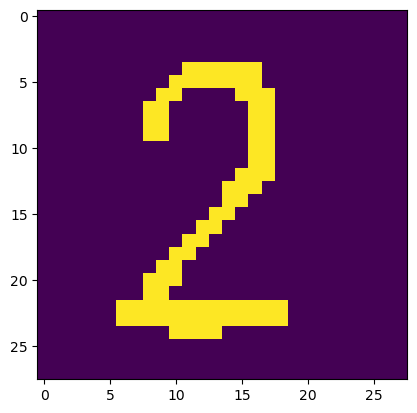

In [67]:
# example of predicting a number value
print(get_predicted_number(base64_to_array("data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/4gHYSUNDX1BST0ZJTEUAAQEAAAHIAAAAAAQwAABtbnRyUkdCIFhZWiAH4AABAAEAAAAAAABhY3NwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9tYAAQAAAADTLQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlkZXNjAAAA8AAAACRyWFlaAAABFAAAABRnWFlaAAABKAAAABRiWFlaAAABPAAAABR3dHB0AAABUAAAABRyVFJDAAABZAAAAChnVFJDAAABZAAAAChiVFJDAAABZAAAAChjcHJ0AAABjAAAADxtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAAgAAAAcAHMAUgBHAEJYWVogAAAAAAAAb6IAADj1AAADkFhZWiAAAAAAAABimQAAt4UAABjaWFlaIAAAAAAAACSgAAAPhAAAts9YWVogAAAAAAAA9tYAAQAAAADTLXBhcmEAAAAAAAQAAAACZmYAAPKnAAANWQAAE9AAAApbAAAAAAAAAABtbHVjAAAAAAAAAAEAAAAMZW5VUwAAACAAAAAcAEcAbwBvAGcAbABlACAASQBuAGMALgAgADIAMAAxADb/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/2wBDAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/wAARCAAcABwDAREAAhEBAxEB/8QAGgAAAQUBAAAAAAAAAAAAAAAAAAUHCAkKC//EACMQAAEEAwEBAAIDAQAAAAAAAAUDBAYHAQIICQARFQoSExT/xAAUAQEAAAAAAAAAAAAAAAAAAAAA/8QAFBEBAAAAAAAAAAAAAAAAAAAAAP/aAAwDAQACEQMRAD8A5/8A8GiCJeLXMFOs6Ki/ph6Sx3i3ovoxCFEIhzUAogvbEuqiK2uPG61zNOnZUXsGswlGZTKvXLmZQ+TsNXEcjbFEmalALZ+40DhUP2/ytJ+IOuOgeTZgbbSY1RVlHoPiUNGaAxGVBWqib2Lyr9Q3LHkwa0ljD4Occx/92YUAOX6wZcm+XYqOVQiv8B8FxNaxnrv+QD6JOjdz2jHBEtk8c1mN/dAnIyNA1fz/AEBVIRm1ktiSMaJUj8fDxmHR9BFBg3LHI6NKyB+OGEpOFSJKFWYJvup27CvQP046M6CrL/nc1hqUC1nXB1ug4bYmEOq8S3iAya5RcunSmiErUHuTQzO2GSqgZ2NUdDBj3dyyQCoj4H55h5ttXr6+6z5rpASOOWtbZ5SNwoUXMsY+NeFEhj8upo8Mk1EmI9HRiNdq5Xcqa6flPGmPzvvrjIbA/QXyX9IOcqaR8xfLnkS2JdzI+CwyRdf9UDB0Hidg9yXSPRcP9UTrx9PMlQ9B1zu/2QryqG+yo0UZfSV4WNy1d3kmuGSbrDirqXhqcgK06ypuS0nO5TE285ARqUOQTl+TiTowYANziOQJYu30aLGABlhphZdJbKw9fP8Al/TGu+wRc+A+B51ej+hl62HU0tfNzrVAHaEWAmqVbRnClbC2Jd0k+LMh0G3OZjDFoUeoIPCLZsLSReukUnDnRVVPTfUGY+A+D//Z")))

313/313 [==============================] - 1s 3ms/step


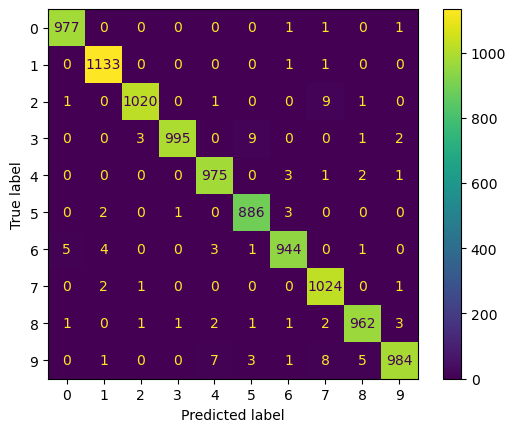

In [68]:
# performance metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(x_test)
y_test_prefictions = np.argmax(test_predictions, axis=1)
confusion = confusion_matrix(y_test, y_test_prefictions)
ConfusionMatrixDisplay(confusion).plot()

plt.show()